In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# import training data
train = pd.read_csv('spacy_train_50.csv')
train_X = train.iloc[:,6:]
train_y = []
train_y.append(train.iloc[:,1])
train_y.append(train.iloc[:,2])
train_y.append(train.iloc[:,3])
train_y.append(train.iloc[:,4])
train_y.append(train.iloc[:,5])

# import validation data for hyperparameter tuning
valid = pd.read_csv('spacy_valid_50.csv')
valid_X = valid.iloc[:,6:]
valid_y = []
valid_y.append(valid.iloc[:,1])
valid_y.append(valid.iloc[:,2])
valid_y.append(valid.iloc[:,3])
valid_y.append(valid.iloc[:,4])
valid_y.append(valid.iloc[:,5])

# import test data
test = pd.read_csv('spacy_test_50.csv')
test_X = test.iloc[:,6:]
test_y = []
test_y.append(test.iloc[:,1])
test_y.append(test.iloc[:,2])
test_y.append(test.iloc[:,3])
test_y.append(test.iloc[:,4])
test_y.append(test.iloc[:,5])

valid set | y=0 | depth=5  | features=3  | c=gini    | 0.7896134287385806
valid set | y=0 | depth=5  | features=3  | c=entropy | 0.789628429563626
valid set | y=0 | depth=5  | features=5  | c=gini    | 0.7896134287385806
valid set | y=0 | depth=5  | features=5  | c=entropy | 0.7896134287385806
valid set | y=0 | depth=5  | features=10 | c=gini    | 0.7896134287385806
valid set | y=0 | depth=5  | features=10 | c=entropy | 0.7895834270884898
valid set | y=0 | depth=10 | features=3  | c=gini    | 0.7885633709854042
valid set | y=0 | depth=10 | features=3  | c=entropy | 0.7887583817109941
valid set | y=0 | depth=10 | features=5  | c=gini    | 0.7883533594347689
valid set | y=0 | depth=10 | features=5  | c=entropy | 0.7888783883113571
valid set | y=0 | depth=10 | features=10 | c=gini    | 0.7876483206576361
valid set | y=0 | depth=10 | features=10 | c=entropy | 0.7885783718104495
valid set | y=0 | depth=20 | features=3  | c=gini    | 0.7609318512518188
valid set | y=0 | depth=20 | features=3

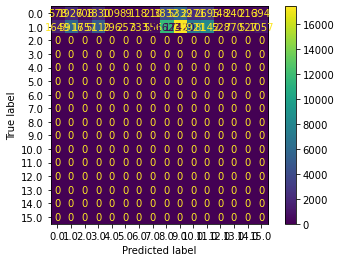

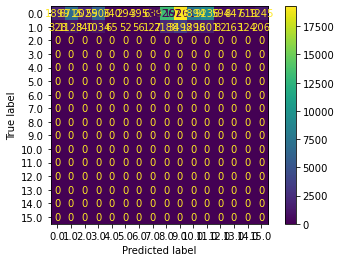

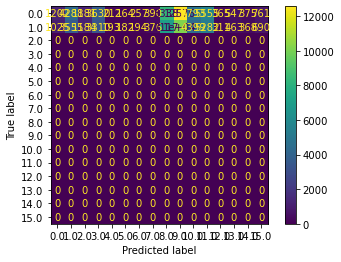

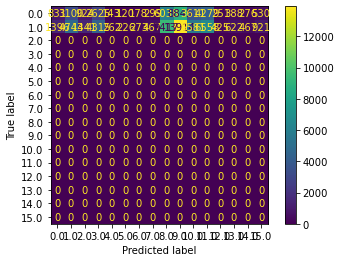

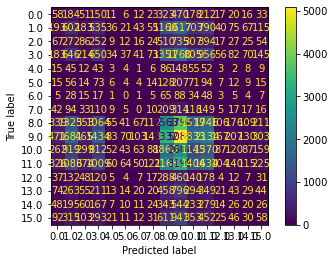

In [21]:
%%timeit -n 1 -r 1
from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(n_estimators = 5, max_depth=10, max_features=10)
# for i in range(len(train_y)):
#     clf.fit(train_X, train_y[i])
#     print('done fitting')
#     Z = clf.predict(train_X)
#     print(accuracy_score(train_y[i], Z))

#     print(clf.feature_importances_)
#     plt.scatter(train_X.iloc[:, -3], train_X.iloc[:, -1], c=Z, alpha=0.3)
#     print(np.unique(Z))
#     print(accuracy_score(train_y[2], Z))

best_acc = 5 * [0]
best_d = 5 * [0]
best_f = 5 * [0]
best_c = 5 * [0]
best_model = 5 * [0]

for i in range(len(train_y)):
    for d in [5, 10, 20]: # depth
        for f in [3, 5, 10]: # num features
            for c in ['gini', 'entropy']: # criterion
                clf = RandomForestClassifier(max_depth=d, max_features=f, criterion=c, n_estimators=5)
                clf.fit(train_X, train_y[i])
    #             print('done fitting')
    #             Z = clf.predict(train_X)
    #             print(f"training accuracy  : {accuracy_score(train_y[i], clf.predict(train_X))}")
                acc_score = accuracy_score(valid_y[i], clf.predict(valid_X))
                print(f"valid set | y={i} | depth={d: <2} | features={f: <2} | c={c: <7} | {acc_score}")
                if acc_score > best_acc[i]:
                    best_acc[i] = acc_score
                    best_d[i] = d
                    best_f[i] = f
                    best_c[i] = c
                    best_model[i] = clf
print(best_acc)
print(best_d)
print(best_f)
print(best_c)

#     plt.scatter(train_X.iloc[:, -3], train_X.iloc[:, -1], c=Z, alpha=0.3)
#     plt.show()
cumulative_score = np.zeros(len(test_y[0]))
for i in range(len(train_y)):
#     clf = SGDClassifier(alpha = best_a[i], penalty = best_p[i]).fit(train_X, train_y[i])
#     Z = clf.predict(valid_X)
    Z = best_model[i].predict(test_X)
    acc_score = accuracy_score(test_y[i], Z)
    if i < 4:
        cumulative_score += (test_y[i] == Z)
    print(f"test set | y={i} | depth={best_d[i]: <2} | features={best_f[i]: <2} | c={best_c[i]: <7} | {acc_score}")
    plot_confusion_matrix(clf, test_X, test_y[i])
print(f"all 4 correct: {sum(cumulative_score==4) / len(cumulative_score)}")
print(f"at least 3 correct: {sum(cumulative_score>=3) / len(cumulative_score)}")


In [3]:
%%timeit -n 1 -r 1
# SGDClassifier is much faster than svm.SVC for support vector machine
# from sklearn.svm import SVC
# clf = SVC(kernel='linear',C=1)
from sklearn.linear_model import SGDClassifier
# store best parameters for each of the 5 y's we are predicting
best_acc = 5 * [0]
best_a = 5 * [1e-5]
best_p = 5 * ['l2']
best_model = 5 * [0]

for i in range(len(train_y)):
    for a in [0.00001, 0.001, 0.1, 10, 1000]: # regularisation term
        for p in ['l2', 'l1']: # regularisation type
            clf = SGDClassifier(alpha = a, penalty = p)
            clf.fit(train_X, train_y[i])
#             print('done fitting')
#             Z = clf.predict(train_X)
#             print(f"training accuracy  : {accuracy_score(train_y[i], clf.predict(train_X))}")
            acc_score = accuracy_score(valid_y[i], clf.predict(valid_X))
            print(f"valid set | y={i} | alpha={a: <6} | {p} reg | {acc_score}")
            if acc_score > best_acc[i]:
                best_acc[i] = acc_score
                best_a[i] = a
                best_p[i] = p
                best_model[i] = clf
print(best_acc)
print(best_a)
print(best_p)

#     plt.scatter(train_X.iloc[:, -3], train_X.iloc[:, -1], c=Z, alpha=0.3)
#     plt.show()
cumulative_score = np.zeros(len(test_y[0]))
for i in range(len(train_y)):
#     clf = SGDClassifier(alpha = best_a[i], penalty = best_p[i]).fit(train_X, train_y[i])
#     Z = clf.predict(valid_X)
    Z = best_model[i].predict(test_X)
    acc_score = accuracy_score(test_y[i], Z)
    if i < 4:
        cumulative_score += (test_y[i] == Z)
    print(f"test set | y={i} | alpha={best_a[i]: <6} | {best_p[i]} reg | {acc_score}")
print(f"all 4 correct: {sum(cumulative_score==4) / len(cumulative_score)}")
print(f"at least 3 correct: {sum(cumulative_score>=3) / len(cumulative_score)}")
print(best_model)
svm_models = best_model
svm_best_a = best_a
svm_vest_p = svm_best_p


valid set | y=0 | alpha=1e-05  | l2 reg | 0.7896134287385806
valid set | y=0 | alpha=1e-05  | l1 reg | 0.7896134287385806
valid set | y=0 | alpha=0.001  | l2 reg | 0.7896134287385806
valid set | y=0 | alpha=0.001  | l1 reg | 0.7896134287385806
valid set | y=0 | alpha=0.1    | l2 reg | 0.7896134287385806
valid set | y=0 | alpha=0.1    | l1 reg | 0.7896134287385806
valid set | y=0 | alpha=10     | l2 reg | 0.7896134287385806
valid set | y=0 | alpha=10     | l1 reg | 0.7896134287385806
valid set | y=0 | alpha=1000   | l2 reg | 0.7896134287385806
valid set | y=0 | alpha=1000   | l1 reg | 0.7896134287385806
valid set | y=1 | alpha=1e-05  | l2 reg | 0.8472615993879663
valid set | y=1 | alpha=1e-05  | l1 reg | 0.8472615993879663
valid set | y=1 | alpha=0.001  | l2 reg | 0.8472615993879663
valid set | y=1 | alpha=0.001  | l1 reg | 0.8472615993879663
valid set | y=1 | alpha=0.1    | l2 reg | 0.8472615993879663
valid set | y=1 | alpha=0.1    | l1 reg | 0.8472615993879663
valid set | y=1 | alpha=

Note on SVC vs SGDClassifier:
SVC took 11 hours (!) to finish running with C=1.
SGD classifier is way faster, but only does linear kernel. maybe can combine it with kernel approximation function?


Results for SVC:
0.7722359579648757
0.8705780392362844
0.5395983327017809
0.6035514502568105
0.21495540990249082
10h 48min 22s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

In [6]:
%%timeit -n 1 -r 1
# import warnings
# warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(C=1)

# for i in range(len(train_y)):
#     clf.fit(train_X, train_y[i])
#     print('done fitting')
#     Z = clf.predict(train_X)
#     print(accuracy_score(train_y[i], Z))

    
best_acc = 5 * [0]
best_a = 5 * [1.]
best_p = 5 * ['l2']
best_model = 5 * [0]

for i in range(len(train_y)):
    for a in [0.0001, 0.01, 1., 100., 10000.]: # regularisation term
        for p in ['l2']: # regularisation type
            clf = LogisticRegression(C = a, penalty = p)
            clf.fit(train_X, train_y[i])
#             print('done fitting')
#             Z = clf.predict(train_X)
#             print(f"training accuracy  : {accuracy_score(train_y[i], clf.predict(train_X))}")
            acc_score = accuracy_score(valid_y[i], clf.predict(valid_X))
            print(f"valid set | y={i} | C={a: <6} | {p} reg | {acc_score}")
            if acc_score > best_acc[i]:
                best_acc[i] = acc_score
                best_a[i] = a
                best_p[i] = p
                best_model[i] = clf
print(best_acc)
print(best_a)
print(best_p)

#     plt.scatter(train_X.iloc[:, -3], train_X.iloc[:, -1], c=Z, alpha=0.3)
#     plt.show()
cumulative_score = np.zeros(len(test_y[0]))
for i in range(len(train_y)):
#     clf = SGDClassifier(alpha = best_a[i], penalty = best_p[i]).fit(train_X, train_y[i])
#     Z = clf.predict(valid_X)
    Z = best_model[i].predict(test_X)
    acc_score = accuracy_score(test_y[i], Z)
    if i < 4:
        cumulative_score += (test_y[i] == Z)
    print(f"test set | y={i} | C={best_a[i]: <7} | {best_p[i]} reg | {acc_score}")
print(f"all 4 correct: {sum(cumulative_score==4) / len(cumulative_score)}")
print(f"at least 3 correct: {sum(cumulative_score>=3) / len(cumulative_score)}")

logisticreg_models = best_model

valid set | y=0 | C=0.0001 | l2 reg | 0.7896134287385806
valid set | y=0 | C=0.01   | l2 reg | 0.7894484196630814
valid set | y=0 | C=1.0    | l2 reg | 0.7892534089374915
valid set | y=0 | C=100.0  | l2 reg | 0.7892234072874008
valid set | y=0 | C=10000.0 | l2 reg | 0.7892384081124462
valid set | y=1 | C=0.0001 | l2 reg | 0.8472615993879663
valid set | y=1 | C=0.01   | l2 reg | 0.8472615993879663
valid set | y=1 | C=1.0    | l2 reg | 0.8472315977378756
valid set | y=1 | C=100.0  | l2 reg | 0.8472165969128302
valid set | y=1 | C=10000.0 | l2 reg | 0.8472165969128302
valid set | y=2 | C=0.0001 | l2 reg | 0.5682762551940357
valid set | y=2 | C=0.01   | l2 reg | 0.5873573046517558
valid set | y=2 | C=1.0    | l2 reg | 0.5876273195025726
valid set | y=2 | C=100.0  | l2 reg | 0.5876273195025726
valid set | y=2 | C=10000.0 | l2 reg | 0.5876573211526634
valid set | y=3 | C=0.0001 | l2 reg | 0.5951427328503067
valid set | y=3 | C=0.01   | l2 reg | 0.5952027361504882
valid set | y=3 | C=1.0    |

In [7]:
%%timeit -n 1 -r 1
from sklearn.naive_bayes import GaussianNB

cumulative_score = np.zeros(len(test_y[0]))

for i in range(len(train_y)):
    clf = GaussianNB()
    clf.fit(train_X, train_y[i])
    acc_score = accuracy_score(valid_y[i], clf.predict(valid_X))
    print(f"valid set | y={i} | {acc_score}")

    Z = clf.predict(test_X)
    acc_score = accuracy_score(test_y[i], Z)
    if i < 4:
        cumulative_score += (test_y[i] == Z)
    print(f"test set | y={i} | {acc_score}")
print(f"all 4 correct: {sum(cumulative_score==4) / len(cumulative_score)}")
print(f"at least 3 correct: {sum(cumulative_score>=3) / len(cumulative_score)}")


valid set | y=0 | 0.647645620509128
test set | y=0 | 0.6348213643878945
valid set | y=1 | 0.765072078964343
test set | y=1 | 0.7694749958066758
valid set | y=2 | 0.5090529979148853
test set | y=2 | 0.5250640979560539
valid set | y=3 | 0.4623404287235798
test set | y=3 | 0.45694055064337574
valid set | y=4 | 0.13503742705848823
test set | y=4 | 0.12334363693000742
all 4 correct: 0.11018857978098867
at least 3 correct: 0.45995974408741286
3.73 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


valid set | y=0 | 0.7896134287385806
test set | y=0 | 0.753144993170872
valid set | y=1 | 0.8472615993879663
test set | y=1 | 0.8527544149713656
valid set | y=2 | 0.5760616833925866
test set | y=2 | 0.5647569070040496
valid set | y=3 | 0.5950827295501253
test set | y=3 | 0.6113746914911461
valid set | y=4 | 0.2109716034381891
test set | y=4 | 0.21414707785205953
all 4 correct: 0.21122373181894424
at least 3 correct: 0.6434476313708576
5min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


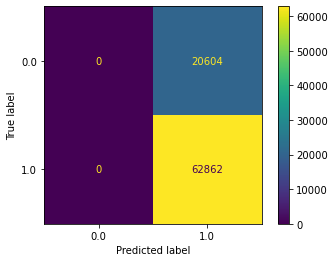

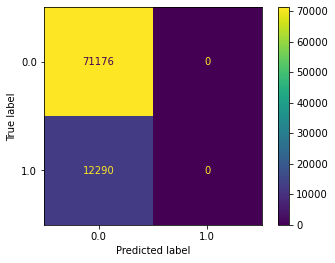

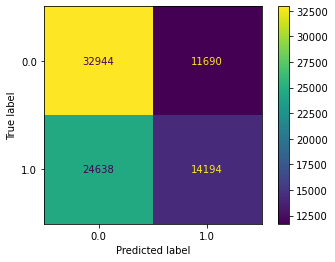

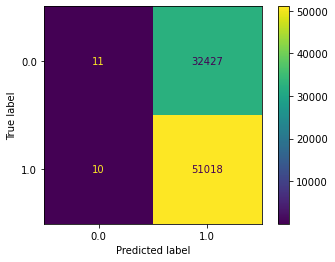

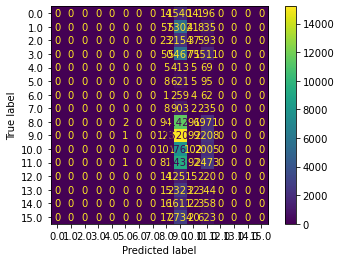

In [20]:
%%timeit -n 1 -r 1
from sklearn.ensemble import AdaBoostClassifier


cumulative_score = np.zeros(len(test_y[0]))

for i in range(len(train_y)):
    clf = AdaBoostClassifier(n_estimators=25)
    clf.fit(train_X, train_y[i])
    acc_score = accuracy_score(valid_y[i], clf.predict(valid_X))
    print(f"valid set | y={i} | {acc_score}")
#     clf = SGDClassifier(alpha = best_a[i], penalty = best_p[i]).fit(train_X, train_y[i])
#     Z = clf.predict(valid_X)
    Z = clf.predict(test_X)
    acc_score = accuracy_score(test_y[i], Z)
    if i < 4:
        cumulative_score += (test_y[i] == Z)
    print(f"test set | y={i} | {acc_score}")
    plot_confusion_matrix(clf, test_X, test_y[i])
print(f"all 4 correct: {sum(cumulative_score==4) / len(cumulative_score)}")
print(f"at least 3 correct: {sum(cumulative_score>=3) / len(cumulative_score)}")


In [11]:
%%timeit -n 1 -r 1
import time
start = time.time()
from sklearn.neighbors import KNeighborsClassifier
# k = 1

# for k in range(1,6):
#     print(k)
#     clf = KNeighborsClassifier(n_neighbors = k)
    
#     for i in range(len(train_y)):
#         clf.fit(train_X, train_y[i])
#         print('done fitting')
#         Z = clf.predict(train_X)
#         print(f"accuracy: {accuracy_score(train_y[i], Z)}")
#         print(f"time:     {time.time() - start}")
#         start = time.time()
        
#     plt.scatter(train_X.iloc[:, -3], train_X.iloc[:, -1], c=Z, alpha=0.3)
#     plt.show()

best_acc = 5 * [0]
best_k = 5 * [1.]
best_model = 5 * [0]

for i in range(len(train_y)):
    for k in [51, 71, 91]: # number of neighbours
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(train_X, train_y[i])
#             print('done fitting')
#             Z = clf.predict(train_X)
#             print(f"training accuracy  : {accuracy_score(train_y[i], clf.predict(train_X))}")
        acc_score = accuracy_score(valid_y[i], clf.predict(valid_X))
        print(f"valid set | y={i} | n neighbours={k: <2} | {acc_score}")
        if acc_score > best_acc[i]:
            best_acc[i] = acc_score
            best_k[i] = k
            best_model[i] = clf
print(best_acc)
print(best_k)

#     plt.scatter(train_X.iloc[:, -3], train_X.iloc[:, -1], c=Z, alpha=0.3)
#     plt.show()
cumulative_score = np.zeros(len(test_y[0]))
for i in range(len(train_y)):
#     clf = SGDClassifier(alpha = best_a[i], penalty = best_p[i]).fit(train_X, train_y[i])
#     Z = clf.predict(valid_X)
    Z = best_model[i].predict(test_X)
    acc_score = accuracy_score(test_y[i], Z)
    if i < 4:
        cumulative_score += (test_y[i] == Z)
    print(f"test set | y={i} | n neighbours={best_k[i]: <2} | {acc_score}")
print(f"all 4 correct: {sum(cumulative_score==4) / len(cumulative_score)}")
print(f"at least 3 correct: {sum(cumulative_score>=3) / len(cumulative_score)}")

knn_model = best_model

valid set | y=0 | n neighbours=51 | 0.7892234072874008
valid set | y=0 | n neighbours=71 | 0.7895234237883083
valid set | y=0 | n neighbours=91 | 0.7896134287385806
valid set | y=1 | n neighbours=51 | 0.8471565936126487
valid set | y=1 | n neighbours=71 | 0.8472165969128302
valid set | y=1 | n neighbours=91 | 0.8472315977378756
valid set | y=2 | n neighbours=51 | 0.5757616668916791
valid set | y=2 | n neighbours=71 | 0.5789718434513899
valid set | y=2 | n neighbours=91 | 0.5801869102800654
valid set | y=3 | n neighbours=51 | 0.5760766842176319
valid set | y=3 | n neighbours=71 | 0.5802469135802469
valid set | y=3 | n neighbours=91 | 0.5848821685192686
valid set | y=4 | n neighbours=51 | 0.20501627589517424
valid set | y=4 | n neighbours=71 | 0.2077764277035237
valid set | y=4 | n neighbours=91 | 0.2097715374345589
[0.7896134287385806, 0.8472315977378756, 0.5801869102800654, 0.5848821685192686, 0.2097715374345589]
[91, 91, 91, 91, 91]
test set | y=0 | n neighbours=91 | 0.753073107612680

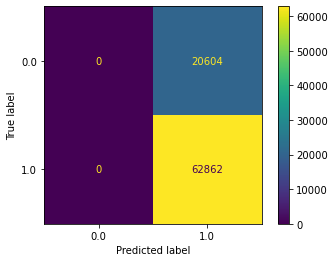

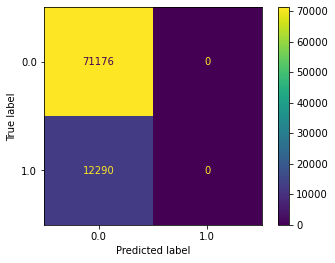

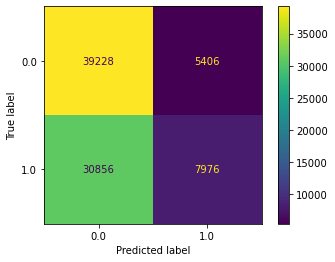

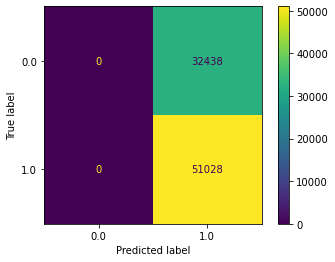

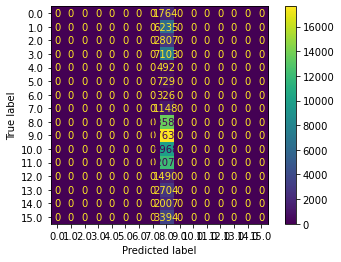

In [19]:
# make confusion matrices
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import plot_confusion_matrix

a = [1e-05, 1e-05, 1e-05, 1e-05, 10]
# p = ['l2', 'l2', 'l1', 'l2', 'l1']
p = ['l1', 'l1', 'l1', 'l1', 'l1']

for i in range(len(train_y)):
    clf = SGDClassifier(alpha = a[i], penalty = p[i]).fit(train_X, train_y[i])
    pred_y = clf.predict(test_X)
    plot_confusion_matrix(clf, test_X, test_y[i])

NameError: name 'plot_confusion_matrix' is not defined